# Logistic Regression

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("bank-additional-full_final.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [33]:
df.shape

(41188, 20)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

# EDA

In [35]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [36]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [37]:
df.duplicated().sum()

1784

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.duplicated().sum()

0

In [40]:
list_cols=[]
for i in df.columns:
    if df[i].dtype=="object":
        continue
    list_cols.append(i)

In [41]:
list_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


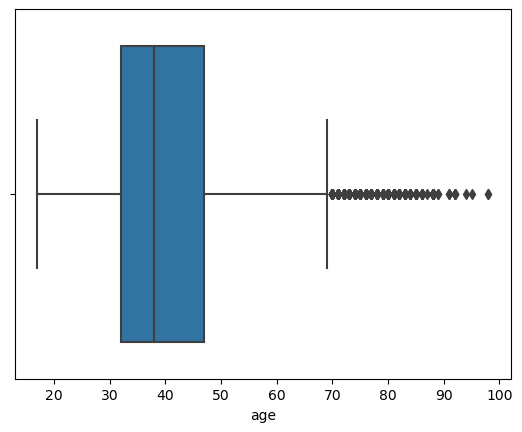

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


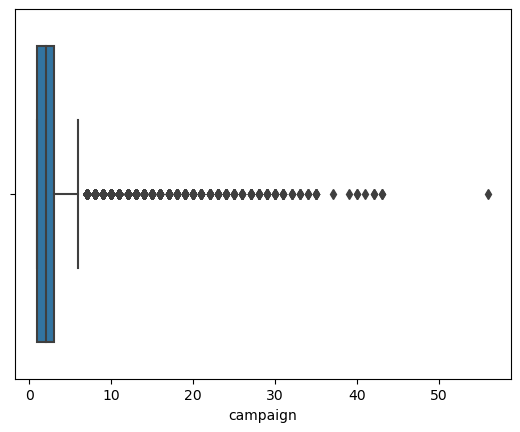

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


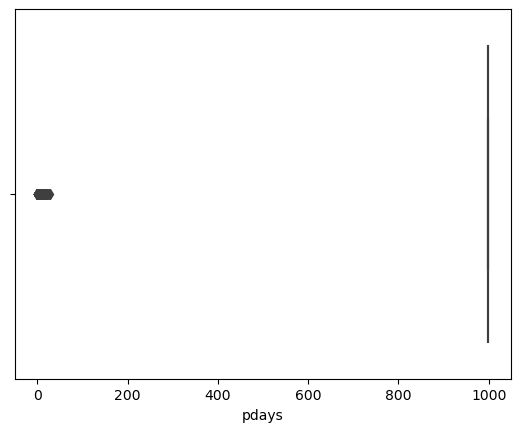

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


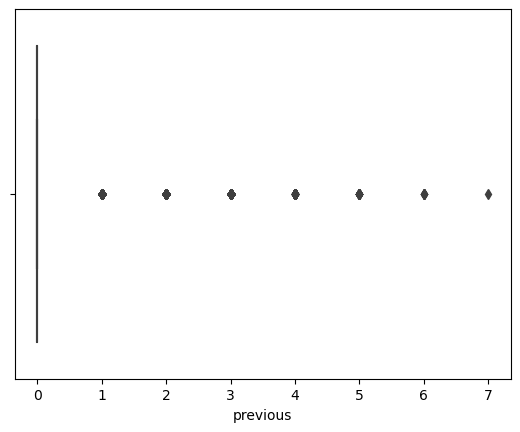

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


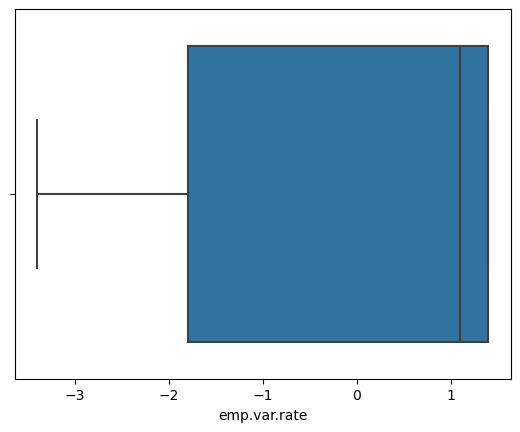

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


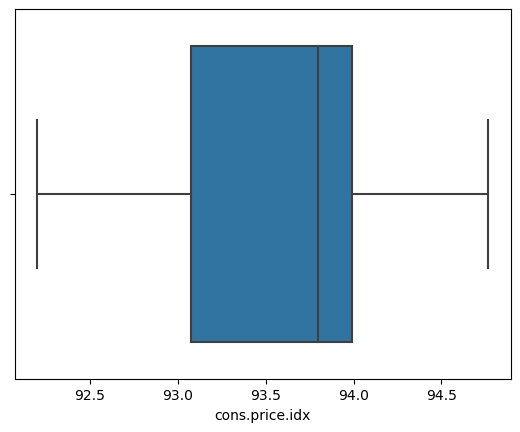

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


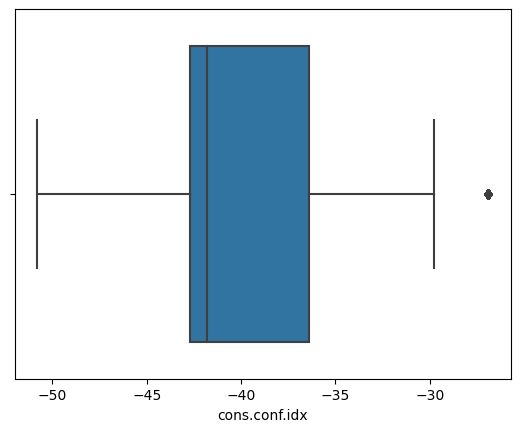

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


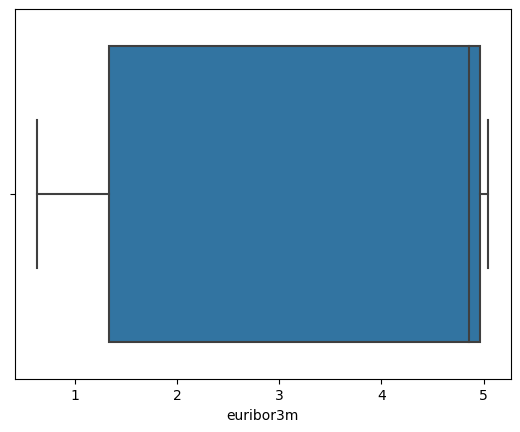

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


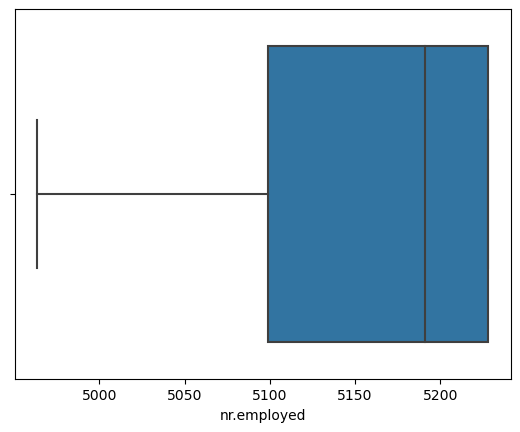

In [42]:
for i in list_cols:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [43]:
outlier_cols=['age','campaign','cons.conf.idx']
for col in outlier_cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR = q3-q1
    low_bound=q1-1.5*IQR
    up_bound=q3+1.5*IQR
    df=df[(df[col]>=low_bound) & (df[col]<=up_bound)]

In [44]:
df.shape

(36178, 20)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


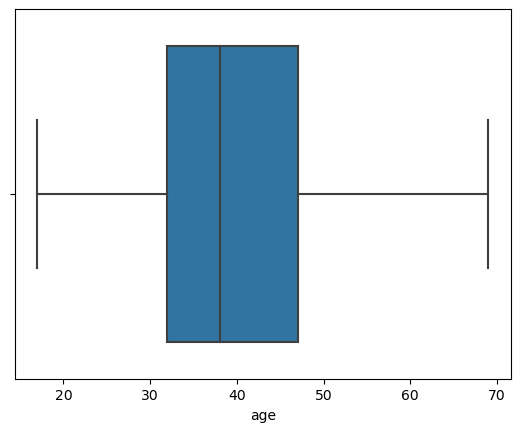

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


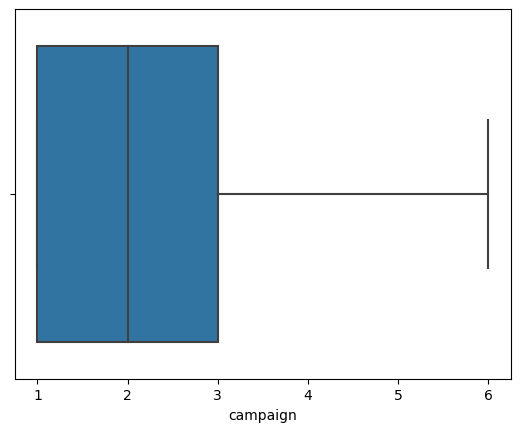

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


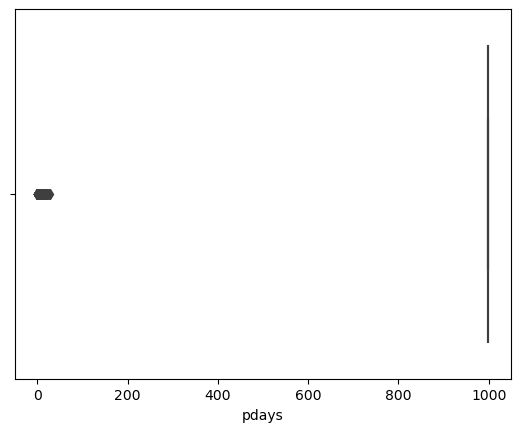

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


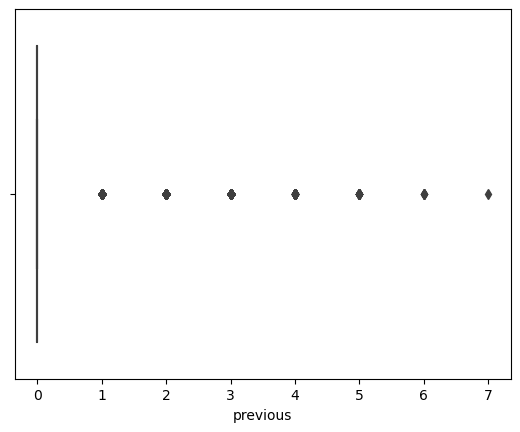

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


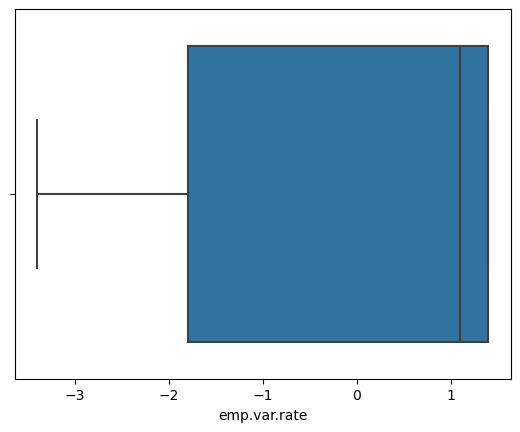

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


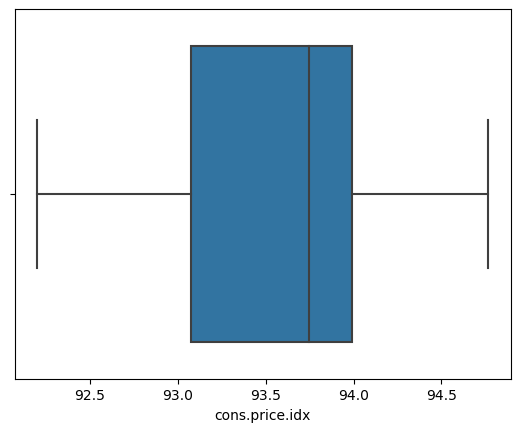

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


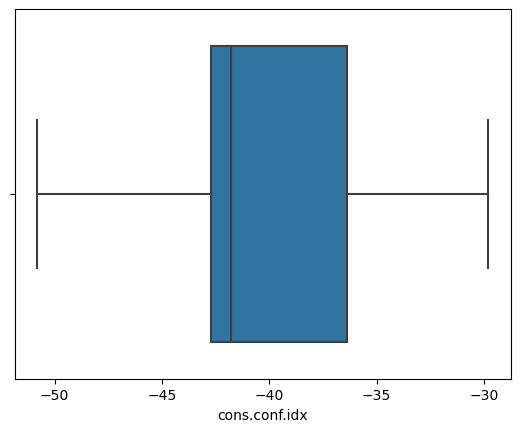

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


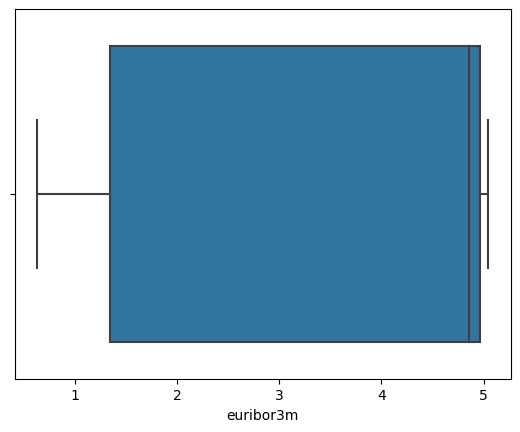

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


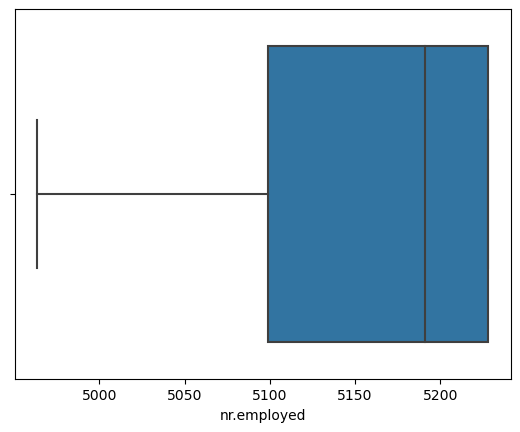

In [45]:
for i in list_cols:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36178 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36178 non-null  int64  
 1   job             36178 non-null  object 
 2   marital         36178 non-null  object 
 3   education       36178 non-null  object 
 4   default         36178 non-null  object 
 5   housing         36178 non-null  object 
 6   loan            36178 non-null  object 
 7   contact         36178 non-null  object 
 8   month           36178 non-null  object 
 9   day_of_week     36178 non-null  object 
 10  campaign        36178 non-null  int64  
 11  pdays           36178 non-null  int64  
 12  previous        36178 non-null  int64  
 13  poutcome        36178 non-null  object 
 14  emp.var.rate    36178 non-null  float64
 15  cons.price.idx  36178 non-null  float64
 16  cons.conf.idx   36178 non-null  float64
 17  euribor3m       36178 non-null 

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()

In [51]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [52]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [54]:
x=df.drop('y',axis=1)
y=df['y']

# Variance Inflation Factor

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif_df=pd.DataFrame()

In [58]:
vif_df['Features']=x.columns

In [60]:
vif_df

,Features
0,age
1,job
2,marital
3,education
4,default
5,housing
6,loan
7,contact
8,month
9,day_of_week


In [61]:
vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)

In [63]:

vif_df['Multicollinearity']=vif_values

In [64]:
vif_df

,Features,Multicollinearity
0,age,21.966070
1,job,2.114551
2,marital,5.649477
3,education,4.533743
4,default,1.413486
5,housing,2.200634
6,loan,1.217609
7,contact,2.935270
8,month,6.604837
9,day_of_week,3.084861


In [65]:
x.drop('nr.employed',axis=1,inplace=True)

In [66]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028


In [67]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,age,21.958629
1,job,2.114409
2,marital,5.648510
3,education,4.531664
4,default,1.410297
5,housing,2.200178
6,loan,1.217517
7,contact,2.468746
8,month,5.711382
9,day_of_week,3.084226


In [68]:
x.drop('cons.price.idx',axis=1,inplace=True)

In [70]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,age,20.768073
1,job,2.108771
2,marital,5.496358
3,education,4.476751
4,default,1.410286
5,housing,2.198755
6,loan,1.217080
7,contact,2.371250
8,month,5.669544
9,day_of_week,3.066477


In [71]:
x.drop('pdays',axis=1,inplace=True)

In [72]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,age,19.894134
1,job,2.105691
2,marital,5.379182
3,education,4.426096
4,default,1.410241
5,housing,2.195607
6,loan,1.216909
7,contact,2.301345
8,month,5.625194
9,day_of_week,3.053601


In [73]:
x.drop('euribor3m',axis=1,inplace=True)

In [74]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,age,16.983749
1,job,2.099141
2,marital,5.187809
3,education,4.277073
4,default,1.409908
5,housing,2.187525
6,loan,1.216483
7,contact,2.289988
8,month,5.248013
9,day_of_week,3.012393


In [75]:
x.drop('cons.conf.idx',axis=1,inplace=True)

In [76]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,age,10.519901
1,job,2.089816
2,marital,4.300933
3,education,4.177050
4,default,1.409069
5,housing,2.152500
6,loan,1.212707
7,contact,2.268380
8,month,4.850603
9,day_of_week,2.943193


In [77]:
x.drop('age',axis=1,inplace=True)

In [78]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,job,2.065035
1,marital,4.291795
2,education,3.979094
3,default,1.322478
4,housing,2.097685
5,loan,1.209040
6,contact,2.266805
7,month,4.548502
8,day_of_week,2.842802
9,campaign,3.217133


In [79]:
x.drop('poutcome',axis=1,inplace=True)

In [80]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
    vif=variance_inflation_factor(x.values,i)
    vif_values.append(vif)
vif_df['Multicollinearity']=vif_values
vif_df

,Features,Multicollinearity
0,job,2.042861
1,marital,4.034238
2,education,3.721585
3,default,1.310552
4,housing,2.059338
5,loan,1.206251
6,contact,2.248569
7,month,4.390682
8,day_of_week,2.732719
9,campaign,3.071028


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23,test_size=0.2)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
model=LogisticRegression()

In [86]:
model.fit(x_train,y_train)

LogisticRegression()

In [87]:
y_pred=model.predict(x_test)

In [89]:
from sklearn.metrics import *

In [91]:
accuracy_score(y_test,y_pred)

0.8823935876174682

In [92]:
confusion_matrix(y_test,y_pred)

array([[6361,   24],
       [ 827,   24]], dtype=int64)

In [94]:
((6361+24)/(827+24+6361+24))*100

88.23935876174683

# Thankyou